In [2]:
# Install Python Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

print("All libraries imported successfully ✅")


All libraries imported successfully ✅


In [4]:
# Read in chunks & sample 50k rows

import pandas as pd

chunksize = 500000   # read 500k rows at a time
sample_list = []

for chunk in pd.read_csv("data/train.csv", chunksize=chunksize):
    sample_list.append(chunk.sample(n=500, random_state=42))  # sample 500 rows per chunk

# Combine and take a final random sample of 50k
df = pd.concat(sample_list).sample(n=50000, random_state=42).reset_index(drop=True)

print("Random sample shape:", df.shape)
df.head()


Random sample shape: (50000, 8)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-07-27 18:15:00.00000069,18.9,2011-07-27 18:15:00 UTC,-73.973473,40.779778,-73.978525,40.750845,5
1,2009-01-28 03:18:00.00000016,16.5,2009-01-28 03:18:00 UTC,-73.952577,40.778278,-73.882693,40.751215,1
2,2014-06-26 08:44:00.000000206,5.0,2014-06-26 08:44:00 UTC,-73.979192,40.740587,-73.984580,40.739477,1
3,2013-12-16 15:03:00.000000111,7.5,2013-12-16 15:03:00 UTC,-73.979800,40.735095,-73.984467,40.742687,1
4,2012-08-12 12:53:00.000000161,6.1,2012-08-12 12:53:00 UTC,0.000000,0.000000,0.000000,0.000000,1


In [5]:
# Save the sampled dataset

df.to_csv("data/train_sample_50k.csv", index=False)

In [6]:
# Load Sampled Data

import pandas as pd

df = pd.read_csv("data/train_sample_50k.csv")
print(df.shape)
df.head()

(50000, 8)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-07-27 18:15:00.00000069,18.9,2011-07-27 18:15:00 UTC,-73.973473,40.779778,-73.978525,40.750845,5
1,2009-01-28 03:18:00.00000016,16.5,2009-01-28 03:18:00 UTC,-73.952577,40.778278,-73.882693,40.751215,1
2,2014-06-26 08:44:00.000000206,5.0,2014-06-26 08:44:00 UTC,-73.979192,40.740587,-73.984580,40.739477,1
3,2013-12-16 15:03:00.000000111,7.5,2013-12-16 15:03:00 UTC,-73.979800,40.735095,-73.984467,40.742687,1
4,2012-08-12 12:53:00.000000161,6.1,2012-08-12 12:53:00 UTC,0.000000,0.000000,0.000000,0.000000,1


In [7]:
# Basic Exploration
# Info & dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  49998 non-null  float64
 6   dropoff_latitude   49998 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [8]:
# Missing values

df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    2
dropoff_latitude     2
passenger_count      0
dtype: int64

In [9]:
# Summary stats

df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,49998.000000,49998.000000,50000.000000
mean,11.280208,-72.428959,39.876033,-72.435004,39.879494,1.689240
std,9.636670,10.705504,6.296772,10.682842,6.286596,1.309757
min,-4.500000,-75.396748,-74.012737,-75.419111,-74.007347,0.000000
25%,6.000000,-73.991987,40.734924,-73.991416,40.734030,1.000000
50%,8.500000,-73.981750,40.752554,-73.980093,40.752975,1.000000
75%,12.500000,-73.967123,40.767182,-73.963766,40.768193,2.000000
max,253.100000,40.814087,51.027731,40.820395,41.366138,6.000000


In [10]:
# Unique values for key categorical columns

df['passenger_count'].value_counts()

passenger_count
1    34468
2     7381
5     3571
3     2249
4     1105
6     1035
0      191
Name: count, dtype: int64

**STEP 1: Quick Data Audit**

*Purpose:* Understand schema, missingness, and basic stats.

In [11]:
# Structure & types
df.info()

# Quick stats (numeric only)
df.describe(include='number').T

# Peek unique counts for small-cardinality columns
for c in ["passenger_count"]:
    if c in df.columns:
        print(c, df[c].value_counts(dropna=False).head(10))
        
# Nulls
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  49998 non-null  float64
 6   dropoff_latitude   49998 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB
passenger_count passenger_count
1    34468
2     7381
5     3571
3     2249
4     1105
6     1035
0      191
Name: count, dtype: int64


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    2
dropoff_latitude     2
passenger_count      0
dtype: int64

- columns present (typical: key, fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count)

- any obvious issues (negatives, out-of-range coords, nulls)

**STEP 2:Parse datetimes & basic cleaning**

*Purpose:* Make datetimes usable and drop clearly invalid rows.

In [13]:
# Parse datetime
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors="coerce", utc=False)

# Remove rows with missing critical fields
critical = ["fare_amount","pickup_datetime","pickup_longitude","pickup_latitude",
            "dropoff_longitude","dropoff_latitude","passenger_count"]
df = df.dropna(subset=critical).copy()

# Basic validity rules
# - positive fare
# - reasonable passenger_count (1..6 keeps most trips; adjust if needed)
df = df[df["fare_amount"] > 0]
df = df[df["passenger_count"].between(1, 6)]


In [14]:
print("Shape after cleaning:", df.shape)


Shape after cleaning: (49805, 8)


Converted pickup_datetime from text to proper datetime format.

Removed rows with missing critical values (dropoff_latitude/longitude).

Filtered out invalid records:

Trips with non-positive fares.

Trips with passenger_count outside 1–6 (removed 0-passenger cases).

Result: Dataset reduced from 50,000 → 49,805 rows, leaving only valid, usable records.

**STEP 3:Geographic sanity filters (NYC bounding box)**

*Purpose:* Remove obviously wrong coordinates (e.g., points in the ocean).

NYC rough bounds work well:

- longitude: [-75, -72] 
- latitude: [40, 41.8]

In [15]:
def in_nyc(lat, lon):
    return (lat.between(40.0, 41.8) & lon.between(-75.0, -72.0))

keep_pick = in_nyc(df["pickup_latitude"], df["pickup_longitude"])
keep_drop = in_nyc(df["dropoff_latitude"], df["dropoff_longitude"])
df = df[keep_pick & keep_drop].copy()


In [16]:
print("Shape after geographic filtering:", df.shape)


Shape after geographic filtering: (48711, 8)


Applied geographic sanity checks to remove trips with pickup/dropoff coordinates outside NYC.

Result: Rows reduced from 49,805 → 48,711.

**STEP 4: Engineer distance features (Haversine + Manhattan-ish)**

*Purpose:* Distance is the strongest predictor of fare.

In [17]:
def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371.0  # km
    lat1 = np.radians(lat1); lon1 = np.radians(lon1)
    lat2 = np.radians(lat2); lon2 = np.radians(lon2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    return 2*R*np.arcsin(np.sqrt(a))

df["distance_km"] = haversine_np(
    df["pickup_latitude"], df["pickup_longitude"],
    df["dropoff_latitude"], df["dropoff_longitude"]
)

# Manhattan-like distance (approx): sum of lat-only and lon-only legs
df["manhattan_km"] = (
    haversine_np(df["pickup_latitude"], df["pickup_longitude"], df["dropoff_latitude"], df["pickup_longitude"]) +
    haversine_np(df["dropoff_latitude"], df["pickup_longitude"], df["dropoff_latitude"], df["dropoff_longitude"])
)


In [18]:
df[["distance_km", "manhattan_km"]].describe()

,distance_km,manhattan_km
count,48711.000000,48711.000000
mean,3.316844,4.271271
std,3.668686,4.839407
min,0.000000,0.000000
25%,1.263709,1.607182
50%,2.154790,2.757629
75%,3.894768,5.034185
max,97.271277,137.489632


Engineered new distance features:

- distance_km (straight-line Haversine distance)

- manhattan_km (grid-like NYC approximation)

Result: Average trip distance ~3–4 km, with some extreme outliers (up to 97 km).

**STEP 5: Time-based features**

*Purpose:* Capture surge/rush effects.

In [19]:
dt = df["pickup_datetime"]
df["year"]        = dt.dt.year
df["month"]       = dt.dt.month
df["day"]         = dt.dt.day
df["hour"]        = dt.dt.hour
df["day_of_week"] = dt.dt.dayofweek   # Monday=0
df["is_weekend"]  = df["day_of_week"].isin([5,6]).astype(int)

In [20]:
df[["pickup_datetime","hour","day_of_week","is_weekend"]].head()

,pickup_datetime,hour,day_of_week,is_weekend
0,2011-07-27 18:15:00+00:00,18,2,0
1,2009-01-28 03:18:00+00:00,3,2,0
2,2014-06-26 08:44:00+00:00,8,3,0
3,2013-12-16 15:03:00+00:00,15,0,0
5,2014-06-19 20:07:00+00:00,20,3,0


Extracted time-based features from pickup_datetime:

- year, month, day, hour, day_of_week, and is_weekend.

- These features help capture surge/rush-hour effects and weekday vs weekend patterns.

Result: New time-related columns added for each trip.

**STEP 6: (Nice boost) Airport proximity features**

*Purpose:* airport trips behave differently.

In [23]:
# Airport coordinates
JFK = (40.6413, -73.7781)
LGA = (40.7769, -73.8740)
EWR = (40.6895, -74.1745)

def dist_to_point(lat, lon, target):
    return haversine_np(lat, lon, target[0], target[1])

for code, coords in [("JFK", JFK), ("LGA", LGA), ("EWR", EWR)]:
    df[f"pickup_to_{code}_km"]  = dist_to_point(df["pickup_latitude"],  df["pickup_longitude"],  coords)
    df[f"dropoff_to_{code}_km"] = dist_to_point(df["dropoff_latitude"], df["dropoff_longitude"], coords)

# Binary flags: within ~2 km of airport
for code in ["JFK","LGA","EWR"]:
    df[f"is_{code}_pickup"]  = (df[f"pickup_to_{code}_km"]  < 2.0).astype(int)
    df[f"is_{code}_dropoff"] = (df[f"dropoff_to_{code}_km"] < 2.0).astype(int)

# Any airport trip flag
airport_cols = [f"is_{c}_{d}" for c in ["JFK","LGA","EWR"] for d in ["pickup","dropoff"]]
df["is_airport_trip"] = (df[airport_cols].sum(axis=1) > 0).astype(int)


Added airport-related features:

- Distance from pickup/dropoff to JFK, LGA, and EWR.

- Flags for trips starting/ending near airports.

- Overall is_airport_trip indicator.

Result: Model can now distinguish airport trips, which typically have unique fare behavior.

**STEP 7: Outlier handling (quantile-based)**

*Purpose:* Remove extreme fares/distances that break training.

In [24]:
# Keep only trips with positive distance, and clamp outliers by quantiles
df = df[df["distance_km"] > 0]

q_low, q_hi = df["fare_amount"].quantile([0.01, 0.99])
df = df[(df["fare_amount"] >= q_low) & (df["fare_amount"] <= q_hi)]

d_low, d_hi = df["distance_km"].quantile([0.01, 0.99])
df = df[(df["distance_km"] >= d_low) & (df["distance_km"] <= d_hi)]

df.shape


(46510, 29)

Removed extreme outliers using quantile filtering:

- Kept fares and distances between the 1st and 99th percentiles.

- Ensured only trips with positive distance remain.

Result: Dataset reduced to 46,510 rows, leaving clean, realistic trips.

**STEP 8: Basic EDA visuals (answer simple questions)**

*Purpose:* understand relationships quickly.

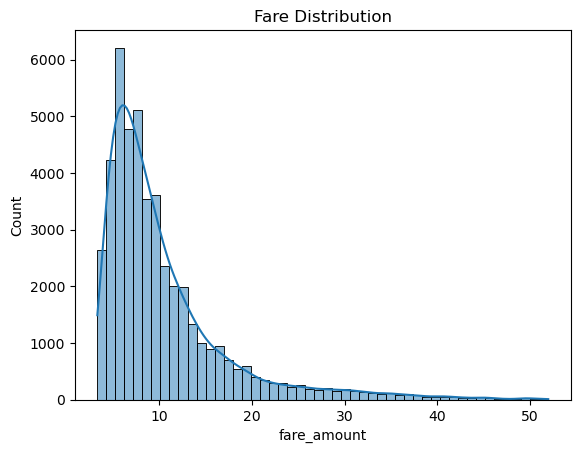

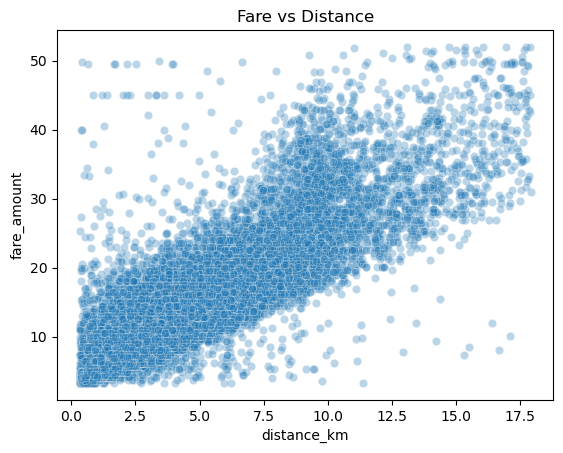

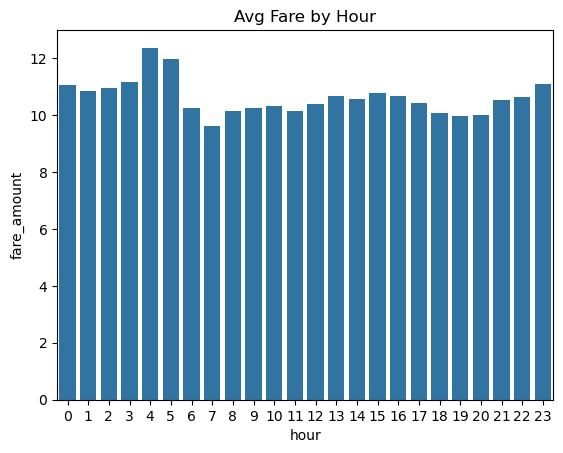

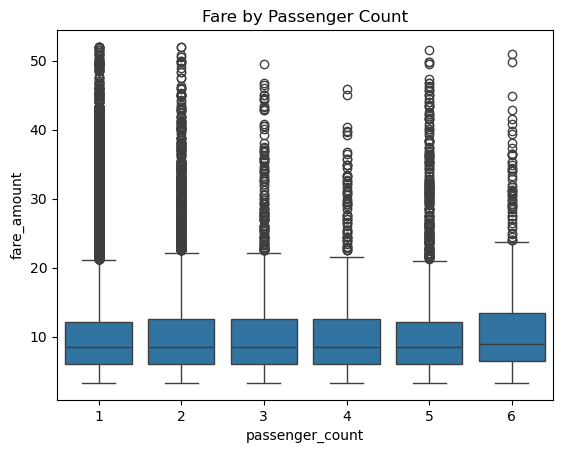

In [25]:
# Distribution of fares
sns.histplot(df["fare_amount"], bins=50, kde=True)
plt.title("Fare Distribution"); plt.show()

# Distance vs fare
sns.scatterplot(x="distance_km", y="fare_amount", data=df, alpha=0.3)
plt.title("Fare vs Distance"); plt.show()

# Average fare by hour
sns.barplot(x="hour", y="fare_amount", data=df, estimator=np.mean, errorbar=None)
plt.title("Avg Fare by Hour"); plt.show()

# Boxplot by passenger count
sns.boxplot(x="passenger_count", y="fare_amount", data=df)
plt.title("Fare by Passenger Count"); plt.show()
